In [86]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
%matplotlib inline

In [87]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [88]:
data.shape

(918, 12)

<h3>Removing duplicates from the dataset</h3>

In [89]:
data.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [90]:
type(data)

pandas.core.frame.DataFrame

<h2>Sorting dataset by age and filtering it to above 50 </h2>

In [91]:
data = data.sort_values("Age")
data = data[data["Age"] > 50]
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
721,51,M,NAP,100,222,0,Normal,143,Y,1.2,Flat,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
681,51,M,ASY,140,261,0,LVH,186,Y,0.0,Up,0
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
401,51,M,ASY,130,0,1,ST,163,N,0.0,Flat,1


In [92]:
data.shape

(602, 12)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 721 to 447
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             602 non-null    int64  
 1   Sex             602 non-null    object 
 2   ChestPainType   602 non-null    object 
 3   RestingBP       602 non-null    int64  
 4   Cholesterol     602 non-null    int64  
 5   FastingBS       602 non-null    int64  
 6   RestingECG      602 non-null    object 
 7   MaxHR           602 non-null    int64  
 8   ExerciseAngina  602 non-null    object 
 9   Oldpeak         602 non-null    float64
 10  ST_Slope        602 non-null    object 
 11  HeartDisease    602 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 61.1+ KB


<h3>From this information, we can tell that there is no NULL values in the filtered dataset.</h3>

<AxesSubplot:xlabel='count', ylabel='HeartDisease'>

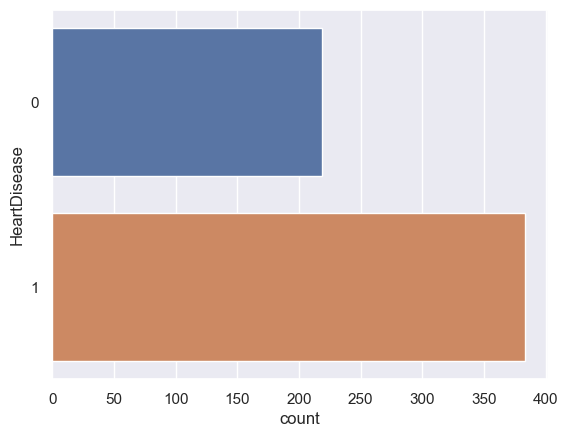

In [94]:
sb.countplot(data = data, y = "HeartDisease")

In [95]:
count0, count1 = data["HeartDisease"].value_counts()
print("Ratio of classes 0 : 1 = ",count0, ":", count1)

Ratio of classes 0 : 1 =  383 : 219


<h3>From this countplot, we observe that there is a class imbalance which might affect the accuracy of our model.</h3>

<h3>We are selecting the features that we want to use to predict HeartDisease</h3>

In [96]:
data1 = pd.DataFrame(data[["Cholesterol", "RestingBP", "MaxHR", "HeartDisease"]])

In [97]:
data1

,Cholesterol,RestingBP,MaxHR,HeartDisease
721,222,100,143,0
334,0,130,170,1
681,261,140,186,0
390,0,140,60,1
401,0,130,163,1
...,...,...,...,...
491,203,170,108,1
541,113,104,120,1
688,197,140,116,0
814,304,125,162,1


In [98]:
data1.describe()

,Cholesterol,RestingBP,MaxHR,HeartDisease
count,602.000000,602.000000,602.000000,602.000000
mean,191.149502,135.186047,130.860465,0.636213
std,117.316859,19.060075,24.249407,0.481489
min,0.000000,0.000000,60.000000,0.000000
25%,152.250000,122.000000,114.250000,0.000000
50%,221.000000,133.500000,130.000000,1.000000
75%,268.750000,145.000000,150.000000,1.000000
max,603.000000,200.000000,195.000000,1.000000


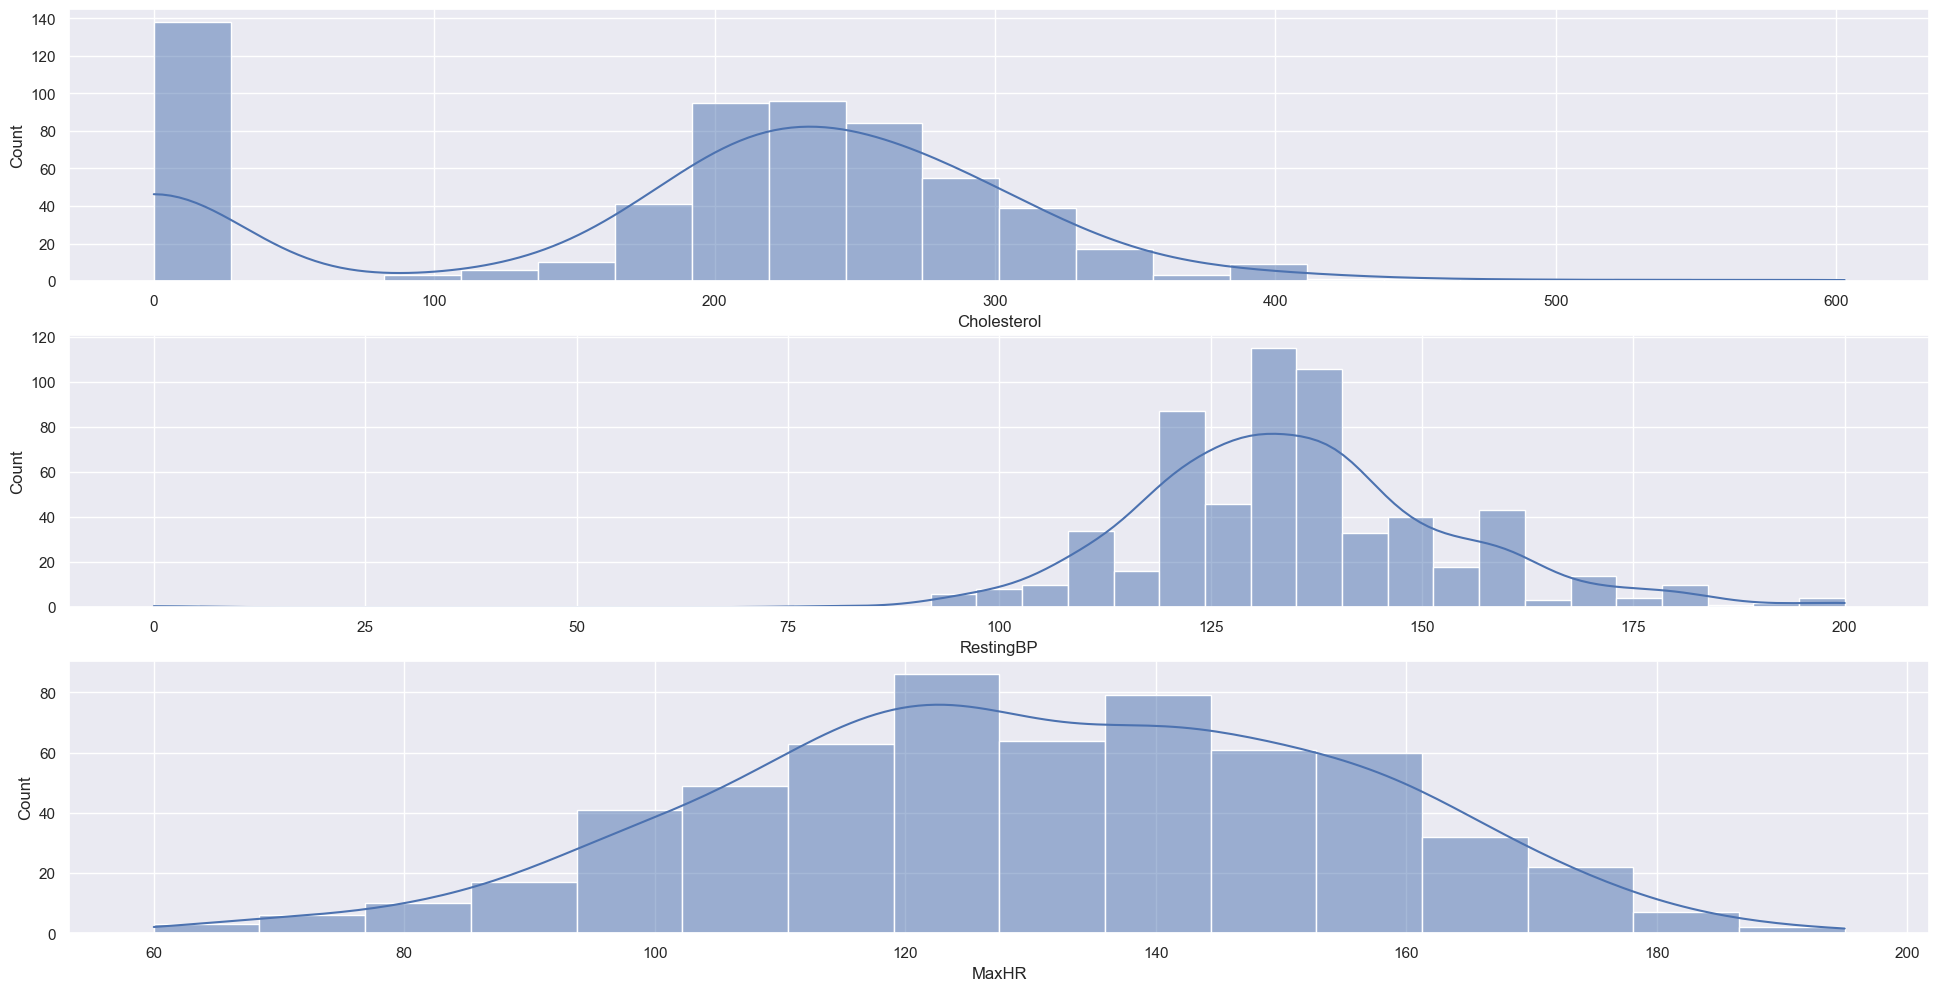

In [99]:
f, axes = plt.subplots(3, figsize = (24,12))
i = 0
for variable in data1.columns:
    if variable not in ["HeartDisease"]:
        sb.histplot(data = data1, x = variable, kde = True, ax = axes[i])
        i += 1

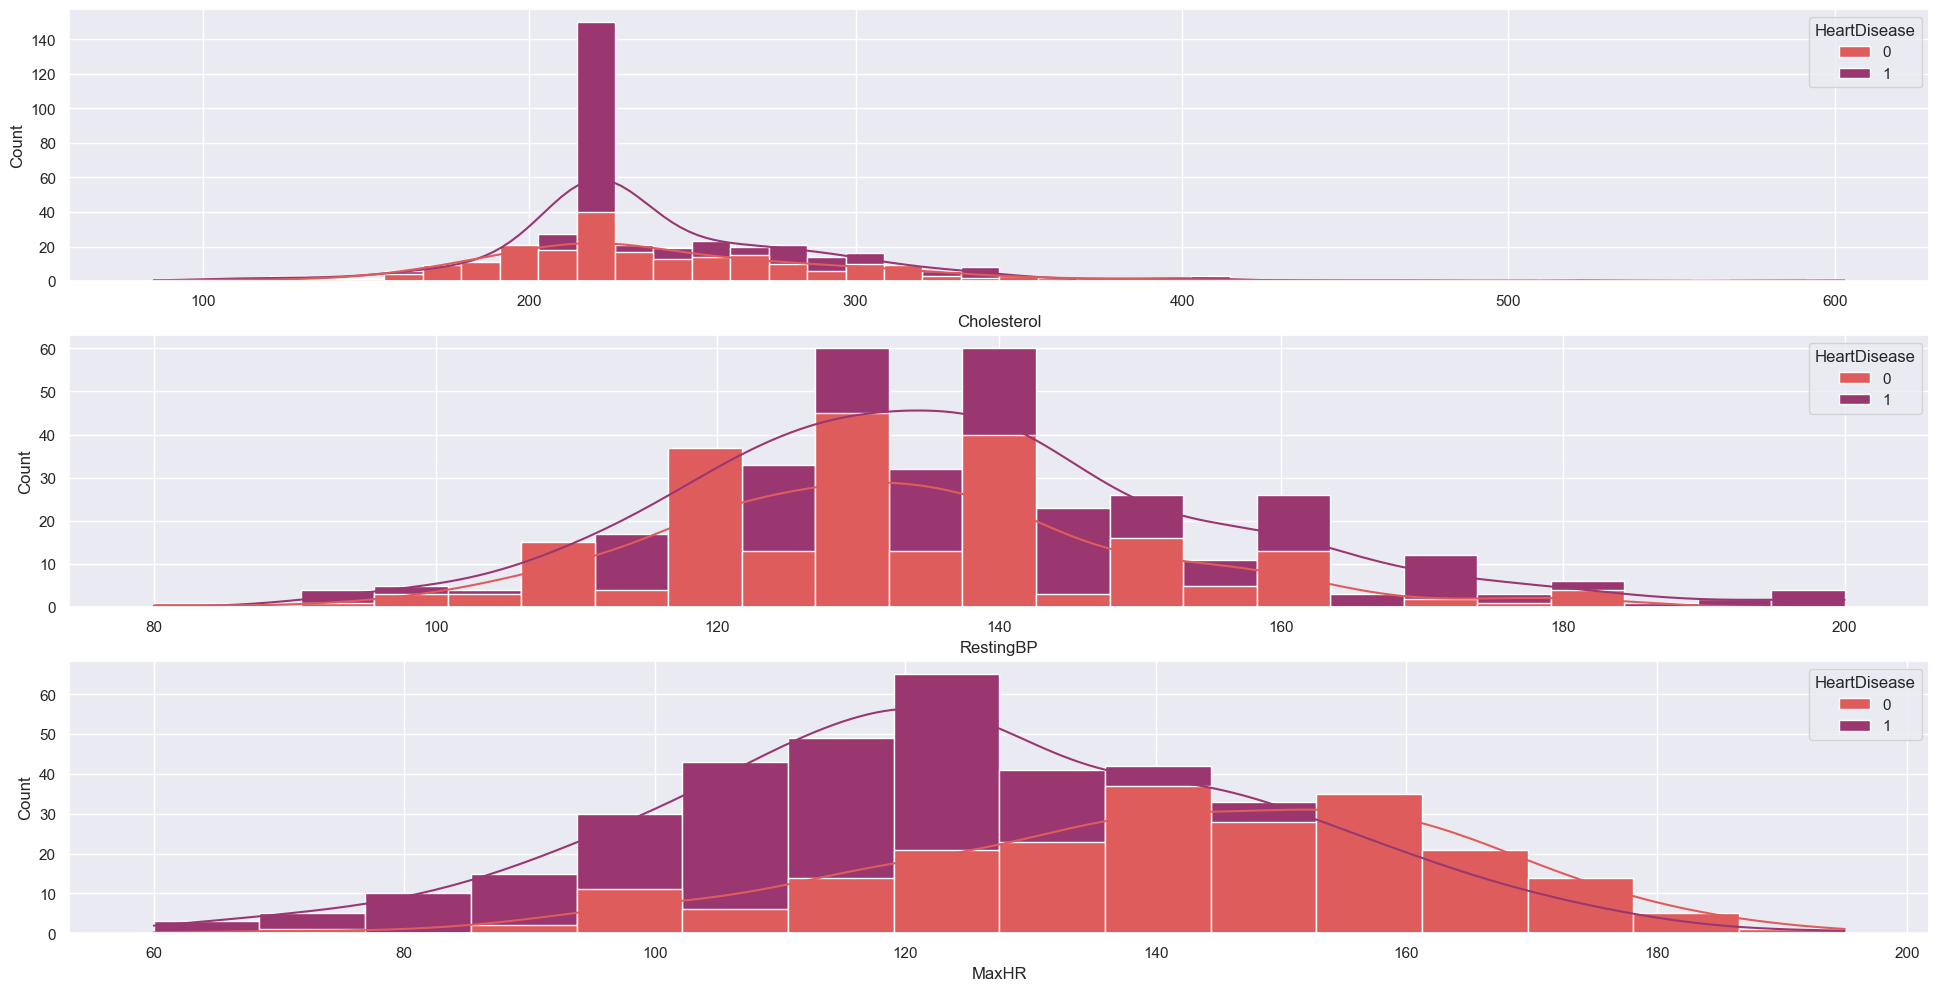

In [166]:
color = "flare"
f, axes = plt.subplots(3, figsize = (24,12))

i = 0
for variable in data1.columns:
    if variable not in ["HeartDisease"]:
        sb.histplot(data = data1, x = variable, kde = True, palette = color, hue = 'HeartDisease',
                   ax = axes[i], alpha = 1)
        i += 1

In [101]:
count = (data1["Cholesterol"] == 0).sum()
print("Number of 0 values of Cholesterol:", count)

Number of 0 values of Cholesterol: 138


<h3>We observe that there were 0 values in Cholesterol as well as RestingBP. This is incorrect values and we need to address it. Since the number of 0s in Cholesterol is 138, it would be unwise to remove 138 out of the 602 rows we have. We decided to replace these 0 values with the median instead of the mean as the mean might be skewed due to the presence of outliers.</h3>

In [102]:
cholesterol = data1["Cholesterol"]
cholesterol.replace(to_replace = 0, value = cholesterol.median(), inplace = True)

In [103]:
restingbp = data1["RestingBP"]
restingbp.replace(to_replace = 0, value = restingbp.median(), inplace = True)

In [104]:
data1.describe()

,Cholesterol,RestingBP,MaxHR,HeartDisease
count,602.000000,602.000000,602.000000,602.000000
mean,241.810631,135.407807,130.860465,0.636213
std,54.838295,18.243734,24.249407,0.481489
min,85.000000,80.000000,60.000000,0.000000
25%,218.000000,122.000000,114.250000,0.000000
50%,221.000000,133.750000,130.000000,1.000000
75%,268.750000,145.000000,150.000000,1.000000
max,603.000000,200.000000,195.000000,1.000000


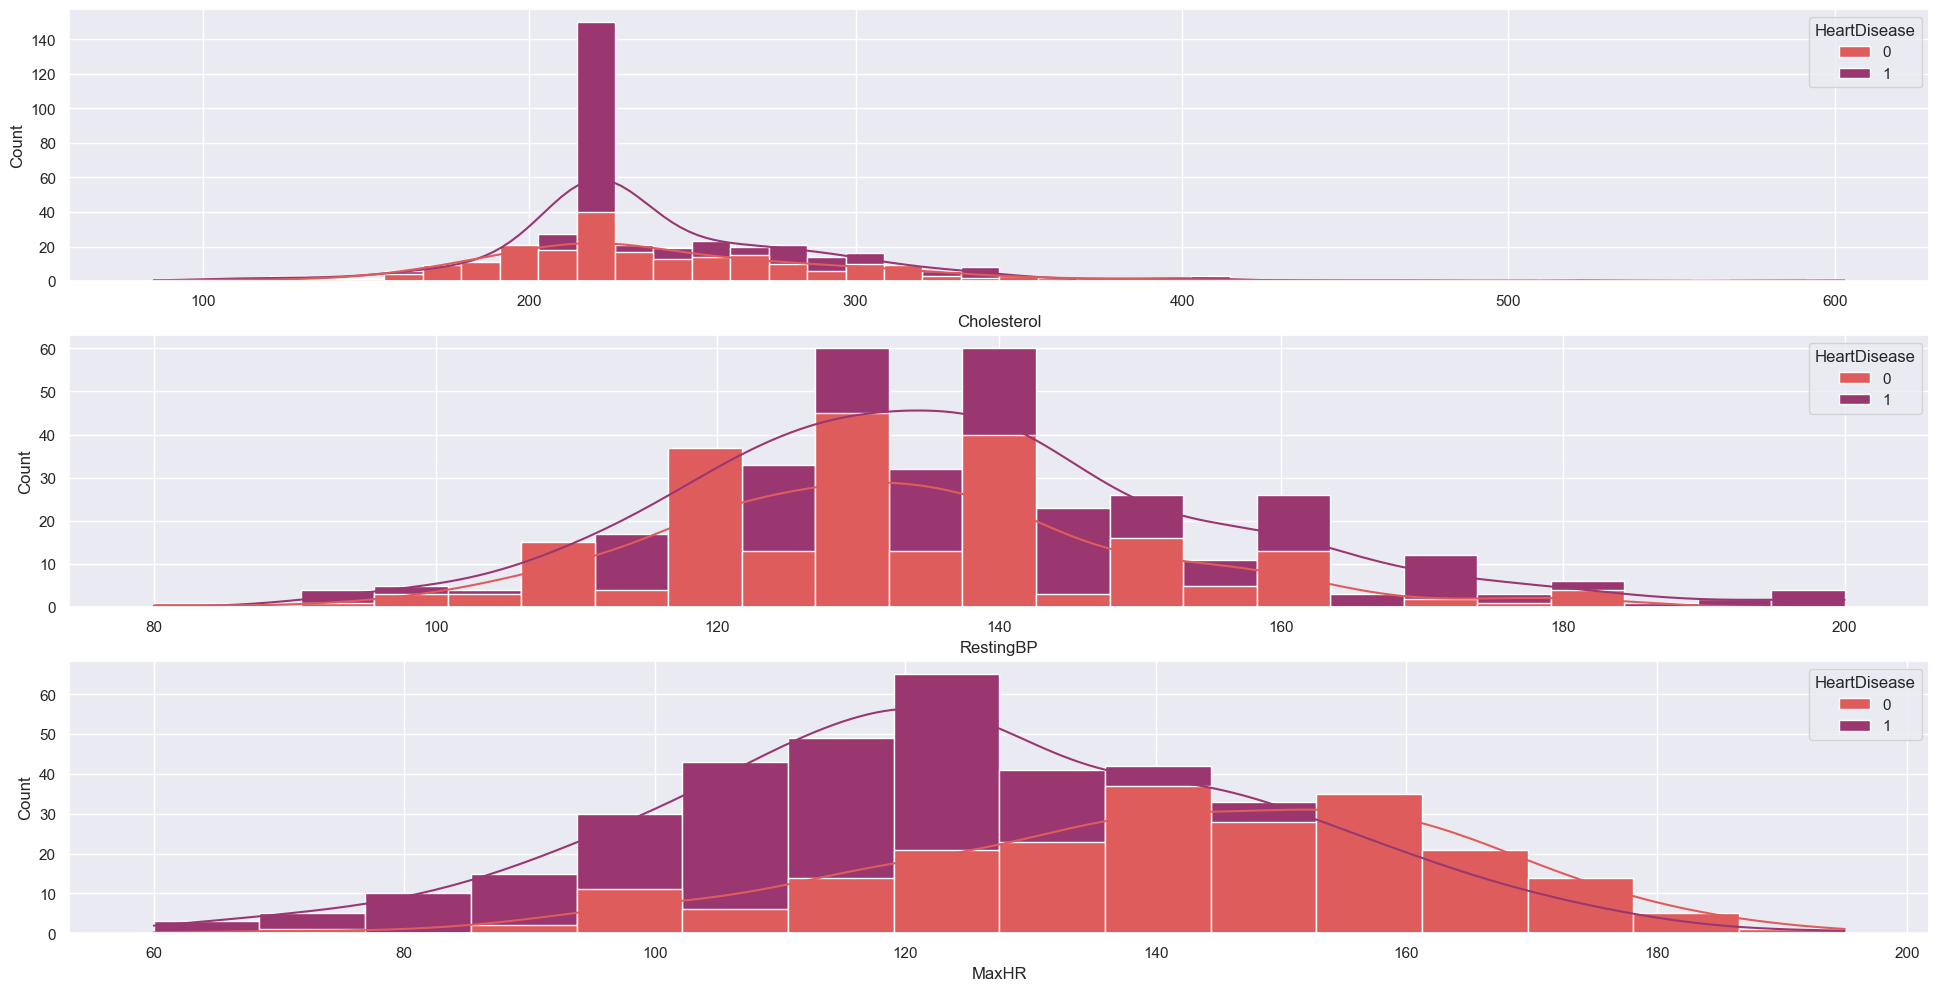

In [167]:
color = "flare"
f, axes = plt.subplots(3, figsize = (24,12))

i = 0;
for variable in data1.columns:
    if variable not in ["HeartDisease"]:
        sb.histplot(data = data1, x = variable, kde = True, palette = color, hue = 'HeartDisease',
                   ax = axes[i], alpha = 1)
        i += 1

<h3>Respective boxplots, with x being the predictor and y being HeartDisease(Response)</h3>

<AxesSubplot:xlabel='Cholesterol', ylabel='HeartDisease'>

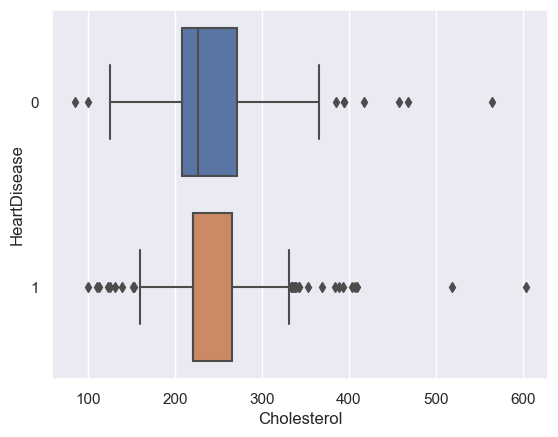

In [106]:
sb.boxplot(data = data1, orient = 'h', x = "Cholesterol", y = "HeartDisease")

<AxesSubplot:xlabel='RestingBP', ylabel='HeartDisease'>

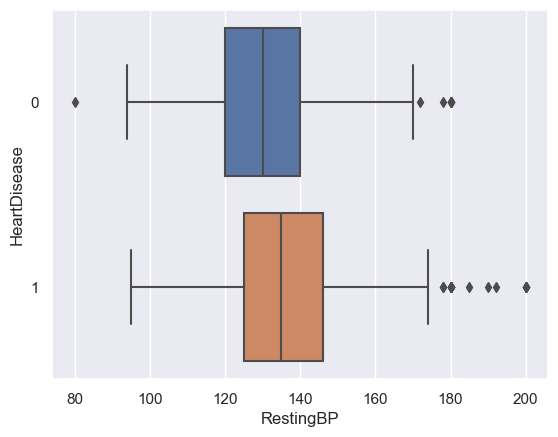

In [107]:
sb.boxplot(data = data1, orient = 'h', x = "RestingBP", y = "HeartDisease")

<AxesSubplot:xlabel='MaxHR', ylabel='HeartDisease'>

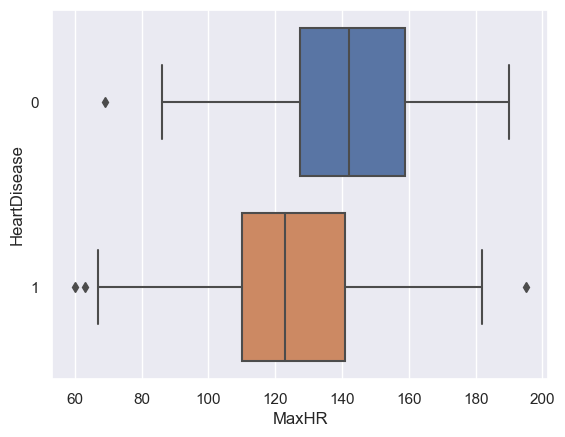

In [108]:
sb.boxplot(data = data1, orient = 'h', x = "MaxHR", y = "HeartDisease")

<h3>From the boxplots above, we can observe that the boxplot of MaxHR against the levels of HeartDisease have the most significant difference, followed by Cholesterol and then RestingBP. This tells us that Cholesterol might be the most "important" in differentiating between the levels of HeartDisease </h3>

<h3>Splitting the dataset into Train and Test</h3>

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

X = pd.DataFrame(data1[[ "Cholesterol", "RestingBP", "MaxHR"]])
y = pd.DataFrame(data1["HeartDisease"])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (481, 3) (481, 1)
Test Set: (121, 3) (121, 1)


<h3>Decision Tree (Depth = 4) with no sampling</h3>

In [111]:
tree1 = DecisionTreeClassifier(max_depth = 4)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'MaxHR <= 132.5\ngini = 0.47\nsamples = 481\nvalue = [182, 299]\nclass = 1'),
 Text(0.25, 0.7, 'Cholesterol <= 201.5\ngini = 0.345\nsamples = 253\nvalue = [56, 197]\nclass = 1'),
 Text(0.125, 0.5, 'Cholesterol <= 174.5\ngini = 0.496\nsamples = 33\nvalue = [15, 18]\nclass = 1'),
 Text(0.0625, 0.3, 'RestingBP <= 130.5\ngini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = 1'),
 Text(0.03125, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 Text(0.1875, 0.3, 'MaxHR <= 114.5\ngini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = 1'),
 Text(0.21875, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.375, 0.5, 'Cholesterol <= 221.5\ngini = 0.303\nsamples = 220\nvalue = [41, 179]\nclass = 1'),
 Text(0.3125, 0.3, 'RestingBP <= 175.0\ngini = 0.208\nsamples = 110\nvalue = [13, 97]\nclass = 1'),
 Tex

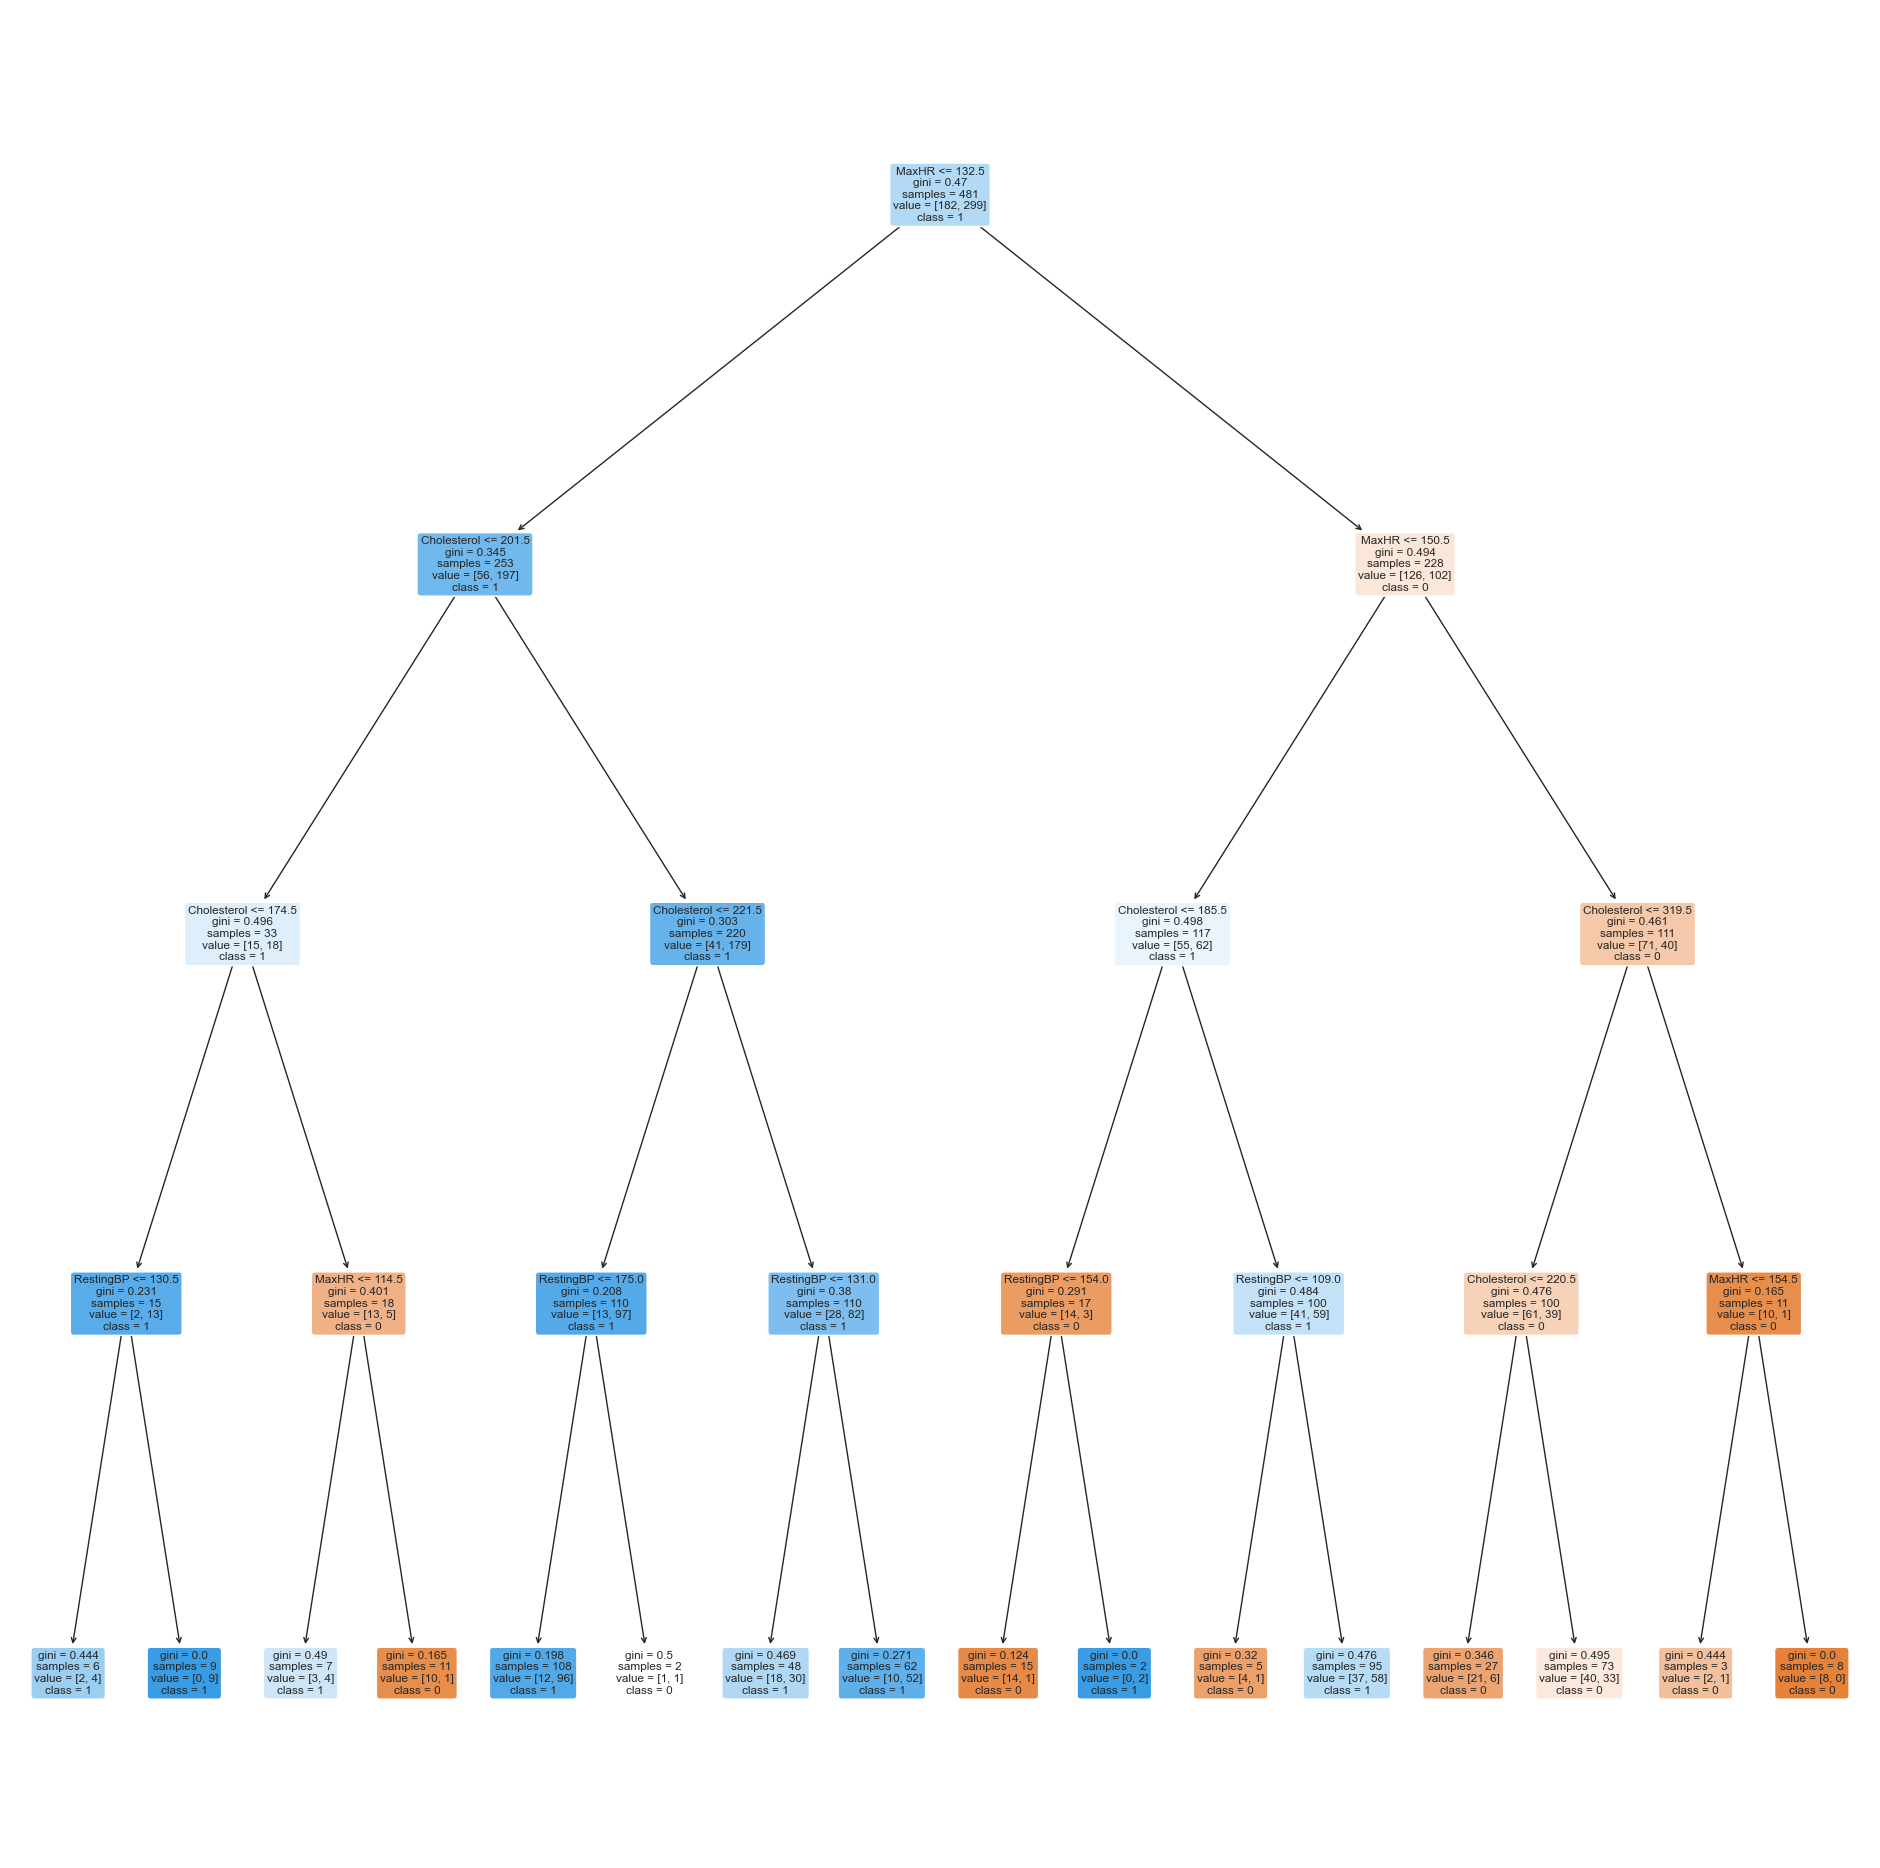

In [112]:
f = plt.figure(figsize = (24,24))
plot_tree(tree1, filled = True, rounded = True,
         feature_names = X_train.columns,
         class_names = ["0", "1"])

<h3>From the tree, we can tell that the most important factors in predicting whether one have a Heart Disease in descending order is : MaxHR, Cholesterol, RestingBP as MaxHR appears higher up in the tree, followed by the rest.</h3>

<AxesSubplot:>

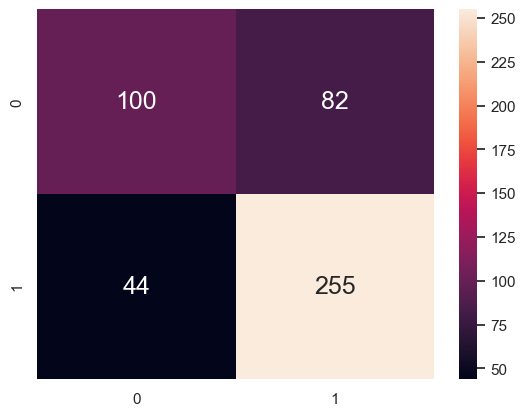

In [113]:
y_train_pred = tree1.predict(X_train)

# Plot the Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [114]:
print("Train Data")
print("Accuracy  :\t", tree1.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives
fpTrain = cmTrain[0][1] # False Positives
tnTrain = cmTrain[0][0] # True Negatives
fnTrain = cmTrain[1][0] # False Negatives

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.738045738045738

TPR Train :	 0.8528428093645485
TNR Train :	 0.5494505494505495

FPR Train :	 0.45054945054945056
FNR Train :	 0.14715719063545152


<AxesSubplot:>

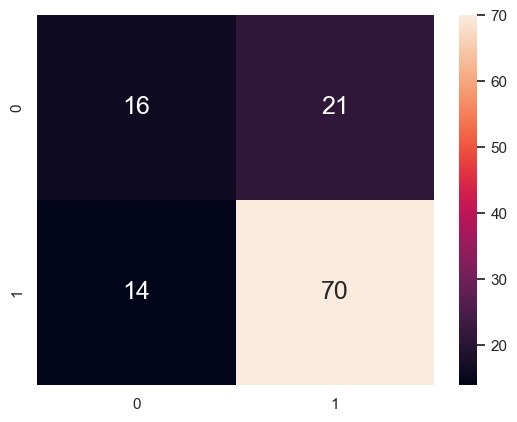

In [115]:
y_test_pred = tree1.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [116]:
print("Test Data")
print("Accuracy  :\t", tree1.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives
fpTest = cmTest[0][1] # False Positives
tnTest = cmTest[0][0] # True Negatives
fnTest = cmTest[1][0] # False Negatives

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.7107438016528925

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666


<h3>Using resampling to fix class imbalance</h3>

In [117]:
from sklearn.utils import resample

heart1 = data1[data1.HeartDisease == 1]
heart0 = data1[data1.HeartDisease == 0]

In [118]:
heart0_up = resample(heart0, 
                    replace=True,                     
                    n_samples=heart1.shape[0])

In [119]:
data1_up = pd.concat([heart1, heart0_up])

In [120]:
data1_up["HeartDisease"].value_counts()

1    383
0    383
Name: HeartDisease, dtype: int64

In [121]:
data1_up

,Cholesterol,RestingBP,MaxHR,HeartDisease
334,221,130.0,170,1
390,221,140.0,60,1
401,221,130.0,163,1
344,221,120.0,104,1
791,298,140.0,122,1
...,...,...,...,...
613,385,140.0,135,0
891,278,146.0,152,0
701,208,128.0,140,0
310,221,155.0,154,0


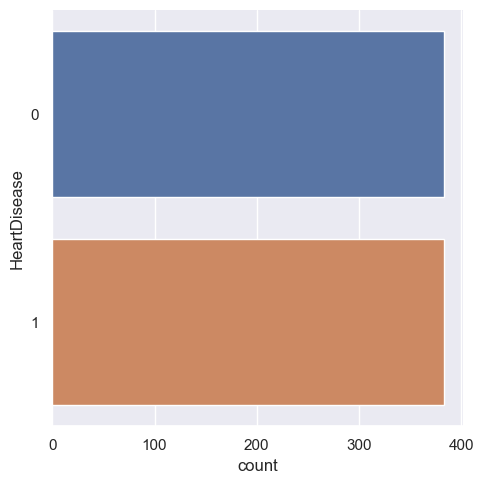

In [122]:
sb.catplot(y = "HeartDisease", data = data1_up, kind = "count")

In [123]:
data1_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 334 to 822
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cholesterol   766 non-null    int64  
 1   RestingBP     766 non-null    float64
 2   MaxHR         766 non-null    int64  
 3   HeartDisease  766 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 29.9 KB


<h3>Splitting the data which have been resampled to Train and Test </h3>

In [124]:
y = pd.DataFrame(data1_up["HeartDisease"])
X = pd.DataFrame(data1_up[["Cholesterol", "RestingBP", "MaxHR"]])

In [125]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2)

<h3>Decision Tree (Depth = 4) with Resampled dataset</h3>

In [126]:
tree2 = DecisionTreeClassifier(max_depth = 4)
tree2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6041666666666666, 0.9, 'MaxHR <= 132.5\ngini = 0.5\nsamples = 612\nvalue = [312, 300]\nclass = 0'),
 Text(0.3333333333333333, 0.7, 'RestingBP <= 136.5\ngini = 0.441\nsamples = 287\nvalue = [94, 193]\nclass = 1'),
 Text(0.16666666666666666, 0.5, 'Cholesterol <= 197.5\ngini = 0.491\nsamples = 167\nvalue = [72, 95]\nclass = 1'),
 Text(0.08333333333333333, 0.3, 'Cholesterol <= 173.0\ngini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = 0'),
 Text(0.041666666666666664, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = 1'),
 Text(0.125, 0.1, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = 0'),
 Text(0.25, 0.3, 'Cholesterol <= 221.5\ngini = 0.477\nsamples = 145\nvalue = [57, 88]\nclass = 1'),
 Text(0.20833333333333334, 0.1, 'gini = 0.42\nsamples = 80\nvalue = [24, 56]\nclass = 1'),
 Text(0.2916666666666667, 0.1, 'gini = 0.5\nsamples = 65\nvalue = [33, 32]\nclass = 0'),
 Text(0.5, 0.5, 'MaxHR <= 109.5\ngini = 0.299\nsamples = 120\nvalue = [22, 98]\nclass = 1'),
 Text(0.416

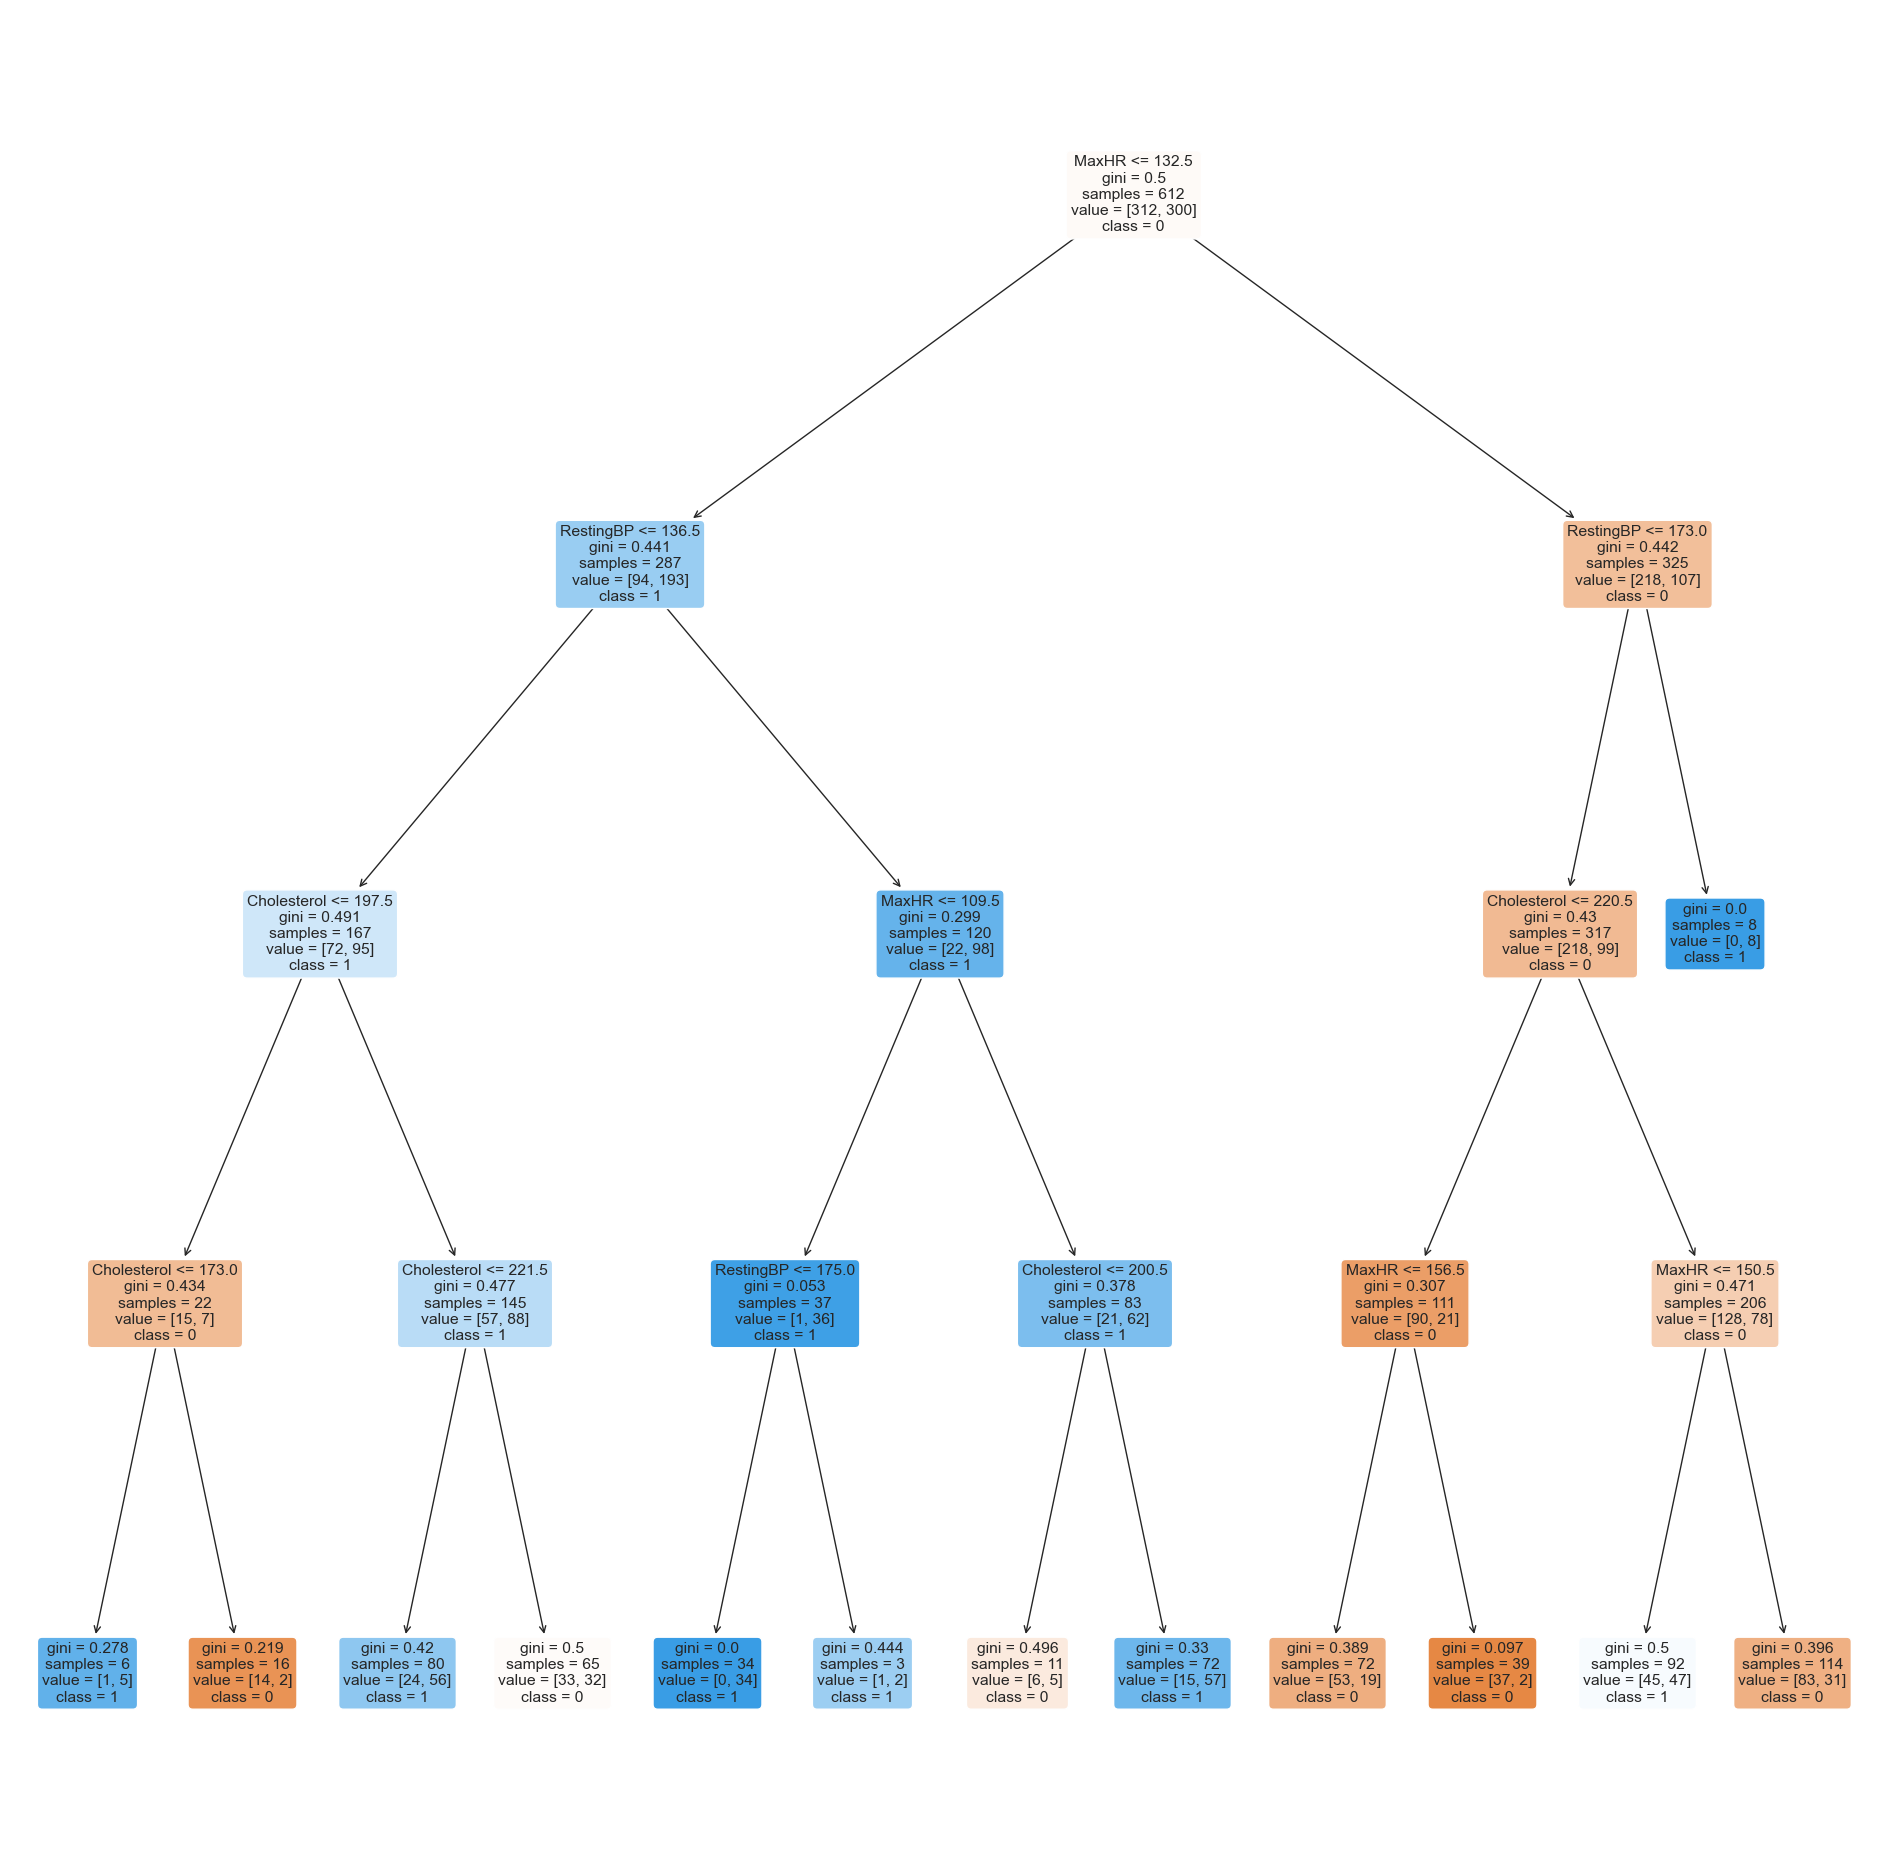

In [127]:
f = plt.figure(figsize = (24,24))
plot_tree(tree2, filled = True, rounded = True,
         feature_names = X2_train.columns,
         class_names = ["0", "1"])

<h3>From the tree, we can tell that the most important factors in predicting whether one have a Heart Disease in descending order is : MaxHR, Cholesterol, RestingBP as MaxHR appears higher up in the tree, followed by the rest.</h3>

Train Data
Accuracy  :	 0.7107843137254902

TPR Train :	 0.6966666666666667
TNR Train :	 0.7243589743589743

FPR Train :	 0.27564102564102566
FNR Train :	 0.30333333333333334


<AxesSubplot:>

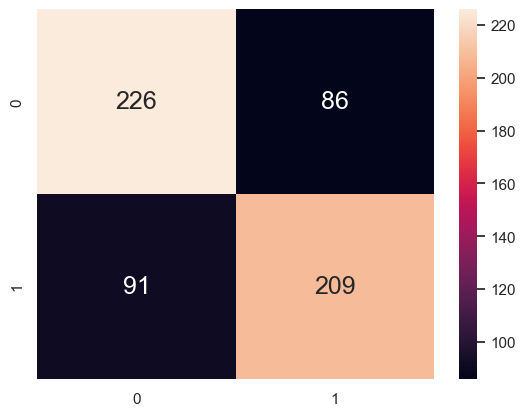

In [128]:
y2_train_pred = tree2.predict(X2_train)

print("Train Data")
print("Accuracy  :\t", tree2.score(X2_train, y2_train))
print()

cmTrain2 = confusion_matrix(y2_train, y2_train_pred)
tpTrain2 = cmTrain2[1][1] # True Positives
fpTrain2 = cmTrain2[0][1] # False Positives
tnTrain2 = cmTrain2[0][0] # True Negatives
fnTrain2 = cmTrain2[1][0] # False Negatives

print("TPR Train :\t", (tpTrain2/(tpTrain2 + fnTrain2)))
print("TNR Train :\t", (tnTrain2/(tnTrain2 + fpTrain2)))
print()

print("FPR Train :\t", (fpTrain2/(tnTrain2 + fpTrain2)))
print("FNR Train :\t", (fnTrain2/(tpTrain2 + fnTrain2)))

sb.heatmap(confusion_matrix(y2_train, y2_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6883116883116883

TPR Test :	 0.6506024096385542
TNR Test :	 0.7323943661971831

FPR Test :	 0.2676056338028169
FNR Test :	 0.3493975903614458


<AxesSubplot:>

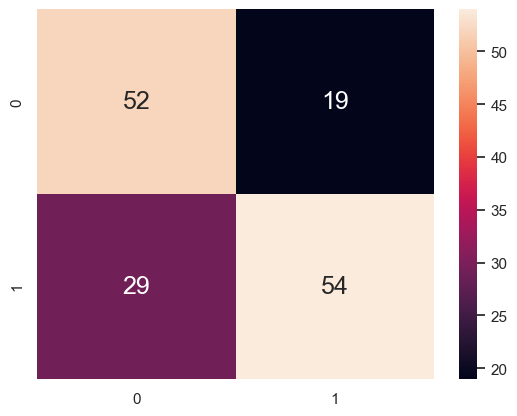

In [129]:
y2_test_pred = tree2.predict(X2_test)

print("Test Data")
print("Accuracy  :\t", tree2.score(X2_test, y2_test))
print()

cmTest2 = confusion_matrix(y2_test, y2_test_pred)
tpTest2 = cmTest2[1][1] # True Positives
fpTest2 = cmTest2[0][1] # False Positives
tnTest2 = cmTest2[0][0] # True Negatives
fnTest2 = cmTest2[1][0] # False Negatives

print("TPR Test :\t", (tpTest2/(tpTest2 + fnTest2)))
print("TNR Test :\t", (tnTest2/(tnTest2 + fpTest2)))
print()

print("FPR Test :\t", (fpTest2/(fpTest2 + tnTest2)))
print("FNR Test :\t", (fnTest2/(fnTest2 + tpTest2)))

sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

<h3>Without resampling and with resampling</h3>

In [130]:
print("Metrics from the tree with no sampling")
print("Classification accuracy:", tree1.score(X_test, y_test))
print()

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

print()

print("Metrics from the tree with resampling")
print("Classification accuracy:", tree2.score(X2_test, y2_test))
print()

print("TPR Test :\t", (tpTest2/(tpTest2 + fnTest2)))
print("TNR Test :\t", (tnTest2/(tnTest2 + fpTest2)))
print()

print("FPR Test :\t", (fpTest2/(fpTest2 + tnTest2)))
print("FNR Test :\t", (fnTest2/(fnTest2 + tpTest2)))

Metrics from the tree with no sampling
Classification accuracy: 0.7107438016528925

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666

Metrics from the tree with resampling
Classification accuracy: 0.6883116883116883

TPR Test :	 0.6506024096385542
TNR Test :	 0.7323943661971831

FPR Test :	 0.2676056338028169
FNR Test :	 0.3493975903614458


<h3>Classification accuracy of the model on the resampled dataset have a lower classification accuracy as well as a higher false negative rate</h3>

<h3>Preparing the dataset required for Logistic Regression</h3>

In [131]:
restingbp_train = pd.DataFrame(X_train["RestingBP"])
restingbp_test = pd.DataFrame(X_test["RestingBP"])

In [132]:
cholesterol_train = pd.DataFrame (X_train["Cholesterol"])
cholesterol_test = pd.DataFrame(X_test["Cholesterol"])

In [133]:
maxhr_train = pd.DataFrame(X_train["MaxHR"])
maxhr_test = pd.DataFrame(X_test["MaxHR"])

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

<h3>Logistic Regression using RestingBP</h3>

In [135]:
model1 = LogisticRegression(solver = 'liblinear', random_state = 0)
y_train = np.ravel(y_train)
model1.fit(restingbp_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

<AxesSubplot:xlabel='RestingBP'>

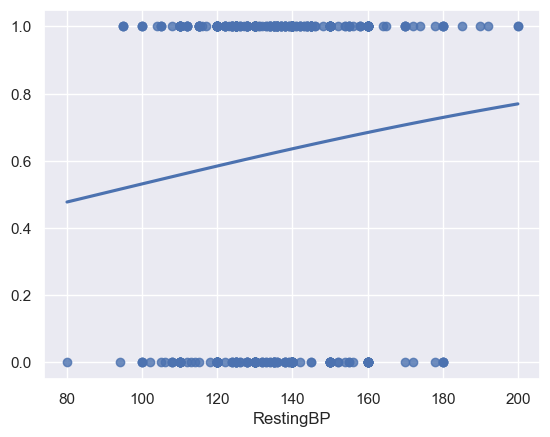

In [136]:
sb.regplot(x = restingbp_train, y = y_train, data = data1, logistic = True, ci = None)

In [137]:
model1.coef_

array([[0.00834891]])

In [138]:
y_train_predbp = model1.predict(restingbp_train)

<AxesSubplot:>

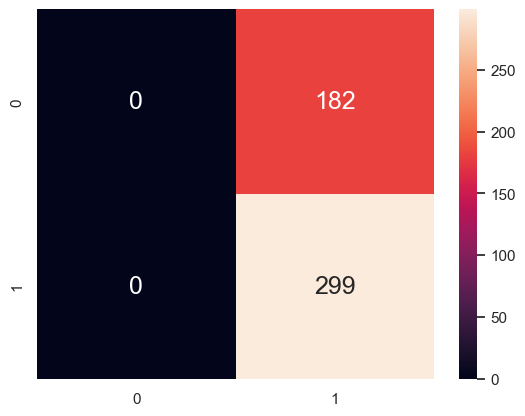

In [139]:
sb.heatmap(confusion_matrix(y_train, y_train_predbp), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [140]:
print("Train Data")
print("Accuracy  :\t", model1.score(restingbp_train, y_train))
print()

cmTrainBP = confusion_matrix(y_train, y_train_predbp)
tpTrainBP = cmTrainBP[1][1] # True Positives
fpTrainBP = cmTrainBP[0][1] # False Positives
tnTrainBP = cmTrainBP[0][0] # True Negatives
fnTrainBP = cmTrainBP[1][0] # False Negatives

print("TPR Train :\t", (tpTrainBP/(tpTrainBP + fnTrainBP)))
print("TNR Train :\t", (tnTrainBP/(tnTrainBP + fpTrainBP)))
print()

print("FPR Train :\t", (fpTrainBP/(tnTrainBP + fpTrainBP)))
print("FNR Train :\t", (fnTrainBP/(tpTrainBP + fnTrainBP)))

Train Data
Accuracy  :	 0.6216216216216216

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


In [141]:
y_test_predbp = model1.predict(restingbp_test)

<AxesSubplot:>

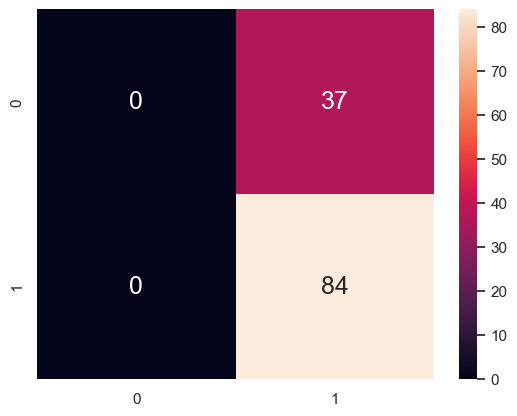

In [142]:
sb.heatmap(confusion_matrix(y_test, y_test_predbp), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [143]:
print("Test Data")
print("Accuracy  :\t", model1.score(restingbp_test, y_test))
print()

cmTestBP = confusion_matrix(y_test, y_test_pred)
tpTestBP = cmTestBP[1][1] # True Positives
fpTestBP = cmTestBP[0][1] # False Positives
tnTestBP = cmTestBP[0][0] # True Negatives
fnTestBP = cmTestBP[1][0] # False Negatives

print("TPR Test :\t", (tpTestBP/(tpTestBP + fnTestBP)))
print("TNR Test :\t", (tnTestBP/(tnTestBP + fpTestBP)))
print()

print("FPR Test :\t", (fpTestBP/(fpTestBP + tnTestBP)))
print("FNR Test :\t", (fnTestBP/(fnTestBP + tpTestBP)))

Test Data
Accuracy  :	 0.6942148760330579

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666


<h3>Logistic Regression using Cholesterol</h3>

In [144]:
model2 = LogisticRegression(solver = 'liblinear', random_state = 0)
model2.fit(cholesterol_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [145]:
model2.coef_

array([[0.00054424]])

<AxesSubplot:xlabel='Cholesterol'>

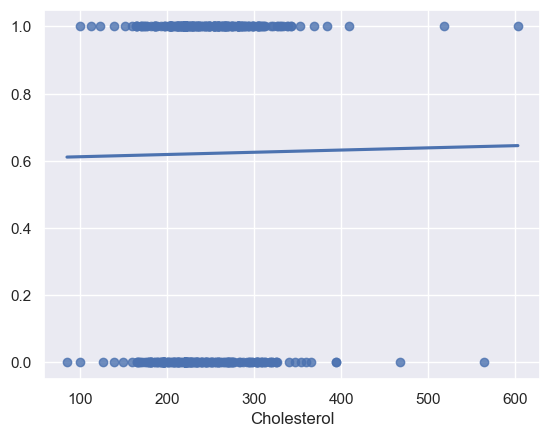

In [146]:
sb.regplot(x = cholesterol_train, y = y_train, data = data1, logistic = True, ci = None)

In [147]:
y_train_predcl = model2.predict(cholesterol_train)

<AxesSubplot:>

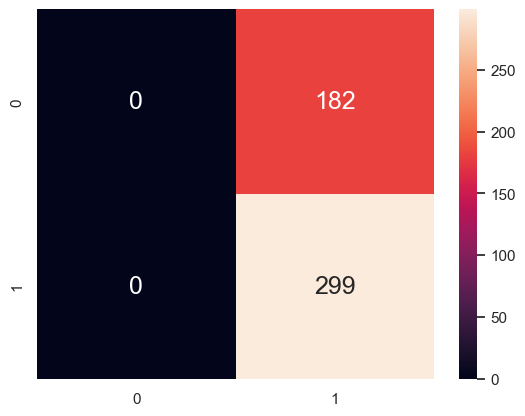

In [148]:
sb.heatmap(confusion_matrix(y_train, y_train_predcl), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [149]:
print("Train Data")
print("Accuracy  :\t", model2.score(cholesterol_train, y_train))
print()

cmTraincl = confusion_matrix(y_train, y_train_predcl)
tpTraincl = cmTraincl[1][1] # True Positives
fpTraincl = cmTraincl[0][1] # False Positives
tnTraincl = cmTraincl[0][0] # True Negatives
fnTraincl = cmTraincl[1][0] # False Negatives

print("TPR Train :\t", (tpTraincl/(tpTraincl + fnTraincl)))
print("TNR Train :\t", (tnTraincl/(tnTraincl + fpTraincl)))
print()

print("FPR Train :\t", (fpTraincl/(tnTraincl + fpTraincl)))
print("FNR Train :\t", (fnTraincl/(tpTraincl + fnTraincl)))

Train Data
Accuracy  :	 0.6216216216216216

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


In [150]:
y_test_predcl = model2.predict(cholesterol_test)

<AxesSubplot:>

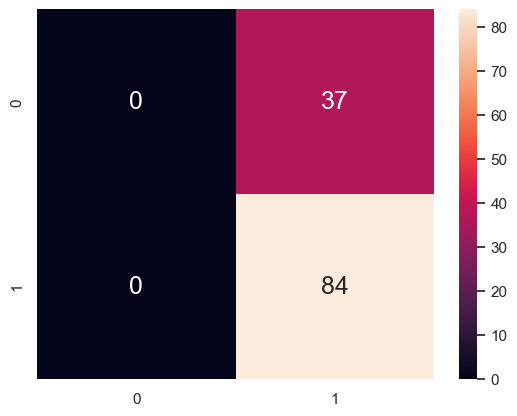

In [151]:
sb.heatmap(confusion_matrix(y_test, y_test_predcl), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [152]:
print("Test Data")
print("Accuracy  :\t", model2.score(cholesterol_test, y_test))
print()

cmTestcl = confusion_matrix(y_test, y_test_pred)
tpTestcl = cmTestcl[1][1] # True Positives
fpTestcl = cmTestcl[0][1] # False Positives
tnTestcl = cmTestcl[0][0] # True Negatives
fnTestcl = cmTestcl[1][0] # False Negatives

print("TPR Test :\t", (tpTestcl/(tpTestcl + fnTestcl)))
print("TNR Test :\t", (tnTestcl/(tnTestcl + fpTestcl)))
print()

print("FPR Test :\t", (fpTestcl/(fpTestcl + tnTestcl)))
print("FNR Test :\t", (fnTestcl/(fnTestcl + tpTestcl)))

Test Data
Accuracy  :	 0.6942148760330579

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666


<h3>Logistic Regression using MaxHR</h3>

In [153]:
model3 = LogisticRegression(solver = 'liblinear', random_state = 0)
model3.fit(maxhr_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [154]:
model3.coef_

array([[-0.02373786]])

<AxesSubplot:xlabel='MaxHR'>

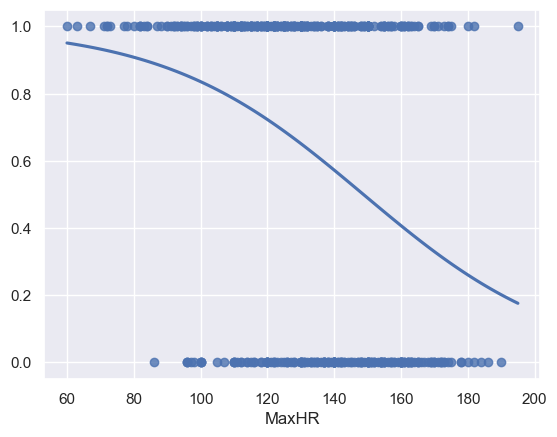

In [155]:
sb.regplot(x = maxhr_train, y = y_train, data = data1, logistic = True, ci = None)

In [156]:
y_train_predhr = model3.predict(maxhr_train)

<AxesSubplot:>

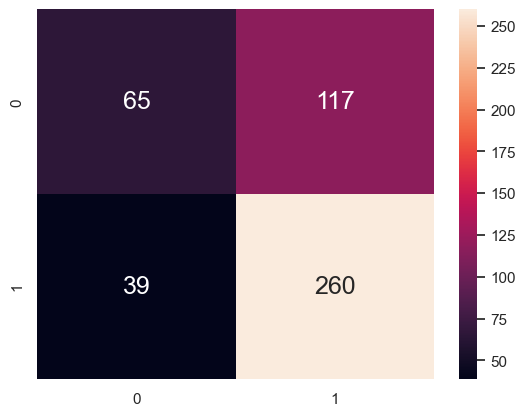

In [157]:
sb.heatmap(confusion_matrix(y_train, y_train_predhr), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [158]:
print("Train Data")
print("Accuracy  :\t", model3.score(maxhr_train, y_train))
print()

cmTrainhr = confusion_matrix(y_train, y_train_predhr)
tpTrainhr = cmTrainhr[1][1] # True Positives
fpTrainhr = cmTrainhr[0][1] # False Positives
tnTrainhr = cmTrainhr[0][0] # True Negatives
fnTrainhr = cmTrainhr[1][0] # False Negatives

print("TPR Train :\t", (tpTrainhr/(tpTrainhr + fnTrainhr)))
print("TNR Train :\t", (tnTrainhr/(tnTrainhr + fpTrainhr)))
print()

print("FPR Train :\t", (fpTrainhr/(tnTrainhr + fpTrainhr)))
print("FNR Train :\t", (fnTrainhr/(tpTrain + fnTrainhr)))

Train Data
Accuracy  :	 0.6756756756756757

TPR Train :	 0.8695652173913043
TNR Train :	 0.35714285714285715

FPR Train :	 0.6428571428571429
FNR Train :	 0.1326530612244898


In [159]:
y_test_predhr = model3.predict(maxhr_test)

<AxesSubplot:>

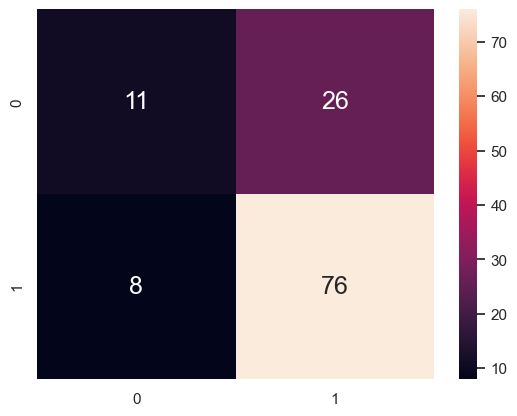

In [160]:
sb.heatmap(confusion_matrix(y_test, y_test_predhr), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [161]:
print("Test Data")
print("Accuracy  :\t", model3.score(maxhr_test, y_test))
print()

cmTesthr = confusion_matrix(y_test, y_test_pred)
tpTesthr = cmTesthr[1][1] # True Positives
fpTesthr = cmTesthr[0][1] # False Positives
tnTesthr = cmTesthr[0][0] # True Negatives 
fnTesthr = cmTesthr[1][0] # False Negatives 

print("TPR Test :\t", (tpTesthr/(tpTesthr + fnTesthr)))
print("TNR Test :\t", (tnTesthr/(tnTesthr + fpTesthr)))
print()

print("FPR Test :\t", (fpTesthr/(fpTesthr + tnTesthr)))
print("FNR Test :\t", (fnTesthr/(fnTesthr + tpTesthr)))

Test Data
Accuracy  :	 0.71900826446281

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666


<h3>Printing out the respective models metric on the test dataset</h3>

In [162]:
print("RestingBP model")
print("Accuracy  :\t", model1.score(restingbp_test, y_test))
print()

print("TPR Test :\t", (tpTestBP/(tpTestBP + fnTestBP)))
print("TNR Test :\t", (tnTestBP/(tnTestBP + fpTestBP)))
print()
print("FPR Test :\t", (fpTestBP/(fpTestBP + tnTestBP)))
print("FNR Test :\t", (fnTestBP/(fnTestBP + tpTestBP)))

print()
print("Cholesterol model")
print("Accuracy  :\t", model2.score(cholesterol_test, y_test))
print()

print("TPR Test :\t", (tpTestcl/(tpTestcl + fnTestcl)))
print("TNR Test :\t", (tnTestcl/(tnTestcl + fpTestcl)))
print()

print("FPR Test :\t", (fpTestcl/(fpTestcl + tnTestcl)))
print("FNR Test :\t", (fnTestcl/(fnTestcl + tpTestcl)))

print()
print("MaxHR model")
print("Accuracy  :\t", model3.score(maxhr_test, y_test))
print()

print("TPR Test :\t", (tpTesthr/(tpTesthr + fnTesthr)))
print("TNR Test :\t", (tnTesthr/(tnTesthr + fpTesthr)))
print()

print("FPR Test :\t", (fpTesthr/(fpTesthr + tnTesthr)))
print("FNR Test :\t", (fnTesthr/(fnTesthr + tpTesthr)))

RestingBP model
Accuracy  :	 0.6942148760330579

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666

Cholesterol model
Accuracy  :	 0.6942148760330579

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666

MaxHR model
Accuracy  :	 0.71900826446281

TPR Test :	 0.8333333333333334
TNR Test :	 0.43243243243243246

FPR Test :	 0.5675675675675675
FNR Test :	 0.16666666666666666


<h3>We can observe that MaxHR have the highest classification accuracy, followed by RestingBP and Cholesterol</h3>